In [1]:
# what's cooking kaggle competition
# https://www.kaggle.com/c/whats-cooking/data?sample_submission.csv.zip
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from collections import Counter

%matplotlib inline

In [2]:
# two ways to read in data
train_file = 'C:/Users/Michael/projects/kaggle/whats_cooking/train.json'
with open(train_file) as train_f:
    train_data = json.loads(train_f.read())
traindf = pd.read_json(train_file)

In [3]:
# look at dataframe
traindf.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [10]:
bag_of_words = [Counter(recipe) for recipe in traindf.ingredients]
sumbags = sum(bag_of_words,Counter())
sumbags

Counter({u'salt': 18049, u'olive oil': 7972, u'onions': 7972, u'water': 7457, u'garlic': 7380, u'sugar': 6434, u'garlic cloves': 6237, u'butter': 4848, u'ground black pepper': 4785, u'all-purpose flour': 4632, u'pepper': 4438, u'vegetable oil': 4385, u'eggs': 3388, u'soy sauce': 3296, u'kosher salt': 3113, u'green onions': 3078, u'tomatoes': 3058, u'large eggs': 2948, u'carrots': 2814, u'unsalted butter': 2782, u'extra-virgin olive oil': 2747, u'ground cumin': 2747, u'black pepper': 2627, u'milk': 2263, u'chili powder': 2036, u'oil': 1970, u'red bell pepper': 1939, u'purple onion': 1896, u'scallions': 1891, u'grated parmesan cheese': 1886, u'sesame oil': 1773, u'corn starch': 1757, u'ginger': 1755, u'baking powder': 1738, u'jalapeno chilies': 1730, u'dried oregano': 1707, u'chopped cilantro fresh': 1698, u'fresh lemon juice': 1679, u'diced tomatoes': 1624, u'fresh parsley': 1604, u'minced garlic': 1583, u'chicken broth': 1554, u'sour cream': 1539, u'cayenne pepper': 1523, u'fresh ginge

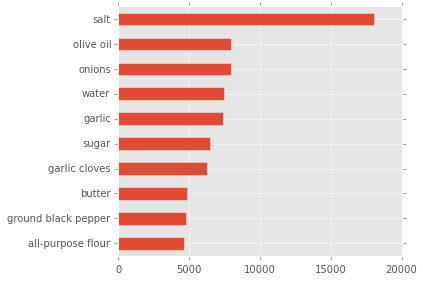

In [11]:
plt.style.use(u'ggplot')
fig = pd.DataFrame(sumbags, index=[0]).transpose()[0].sort(ascending=False, inplace=False)[:10].plot(kind='barh')
fig.invert_yaxis()
fig = fig.get_figure()
fig.tight_layout()
plt.show()

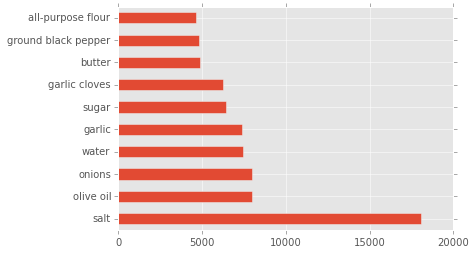

In [25]:
df = pd.DataFrame(sumbags,index=[0]).transpose()[0].sort(ascending=False,inplace=False)[:10].plot(kind='barh')
df

In [23]:
len(sumbags)

6714

In [30]:
bag_of_cuisine = Counter(traindf.cuisine)
print(bag_of_cuisine)
#sumbags = sum(bag_of_words,Counter())
#sumbags

Counter({u'italian': 7838, u'mexican': 6438, u'southern_us': 4320, u'indian': 3003, u'chinese': 2673, u'french': 2646, u'cajun_creole': 1546, u'thai': 1539, u'japanese': 1423, u'greek': 1175, u'spanish': 989, u'korean': 830, u'vietnamese': 825, u'moroccan': 821, u'british': 804, u'filipino': 755, u'irish': 667, u'jamaican': 526, u'russian': 489, u'brazilian': 467})


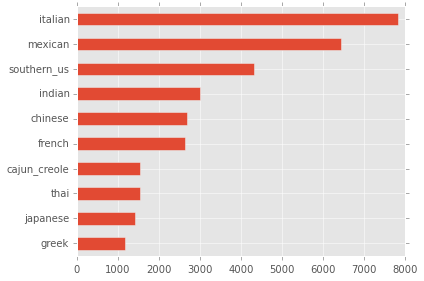

In [31]:
plt.style.use(u'ggplot')
fig = pd.DataFrame(bag_of_cuisine, index=[0]).transpose()[0].sort(ascending=False, inplace=False)[:10].plot(kind='barh')
fig.invert_yaxis()
fig = fig.get_figure()
fig.tight_layout()
plt.show()

In [ ]:
# create list of unique ingredients
ingredients_list = []
for i in range(len(traindf.ingredients)):
    for j in range(len(traindf.ingredients[i])):
        if traindf.ingredients[i][j] not in ingredients_list:
            ingredients_list.append(traindf.ingredients[i][j].encode('ascii','ignore'))
ingredients_list